In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#load the data
data_white = pd.read_csv('winequality-white.csv',';')
data_red = pd.read_csv('winequality-red.csv', ';')


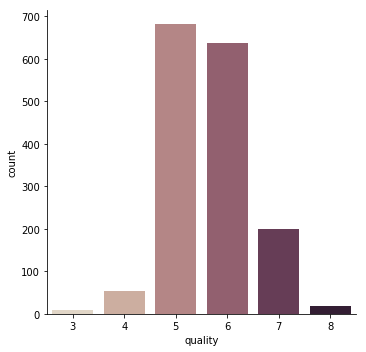

In [4]:
# Check distribution of quality classes
sns.catplot(x="quality", kind="count", palette="ch:.25", data=data_red)

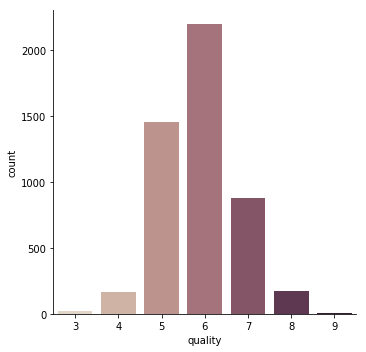

In [5]:
sns.catplot(x="quality", kind="count", palette="ch:.25", data=data_white)

In [3]:
# Split between features and label
y = data_red['quality'].values
X = data_red.drop(axis=1, labels=['quality'])
# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

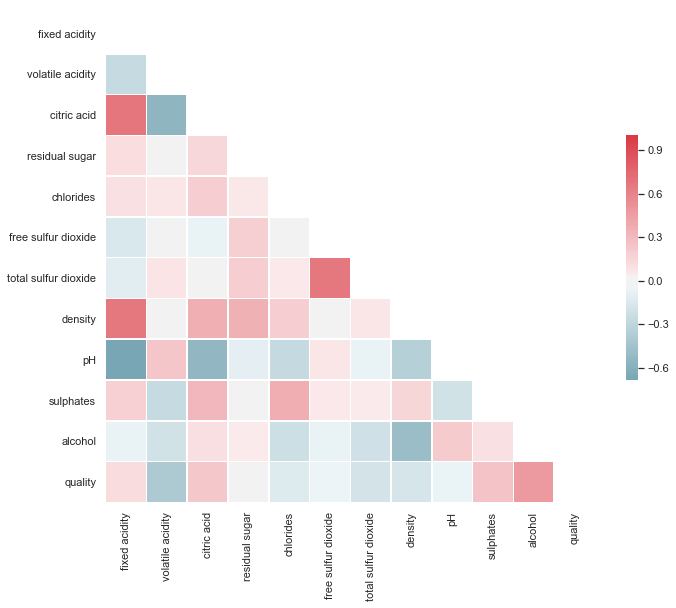

In [16]:
# Compute correlation matrix
corr = data_red.corr()

# Generate matrix for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")

# Setup matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, square=True, cmap=cmap, center=0, linewidths=0.5, cbar_kws={"shrink": .5});


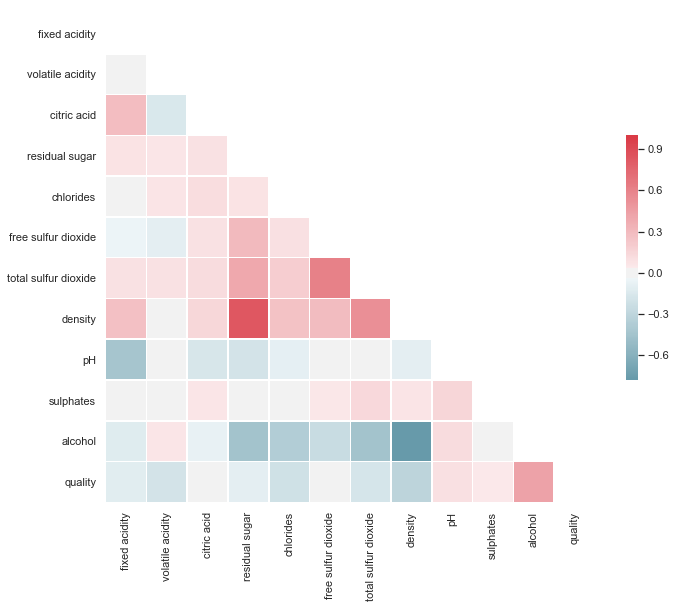

In [15]:
# Compute correlation matrix
corr = data_white.corr()

# Generate matrix for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")

# Setup matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, square=True, cmap=cmap, center=0, linewidths=0.5, cbar_kws={"shrink": .5});


In [4]:
# Test and training validation sets for red wine model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 50, 100],
    'gamma': [0.01, 0.1, 0.5, 1]
}

svc = SVC(gamma='scale', random_state=8)
clf = GridSearchCV(svc, param_grid=parameters, cv=3)
clf.fit(X_train, y_train)

print("Train: ", clf.score(X_train, y_train))
print("Test:  ", clf.score(X_test, y_test))



Train:  0.8498659517426274
Test:   0.65625


C:\anaconda\envs\mlp\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
# Best estimator
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=8, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
#plot the result
plt.plot(clf.predict(X_test), 'o')
plt.plot(y_test, 'x')
plt.legend(( 'Prediction', 'Actual value'))

C:\anaconda\envs\mlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


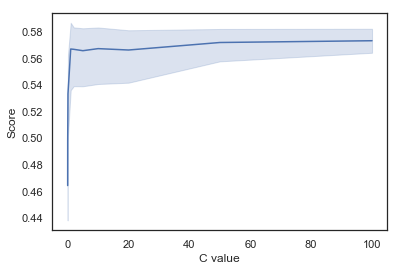

In [10]:
# Score versus C value
ax = sns.lineplot(x=clf.cv_results_['param_C'] ,y=clf.cv_results_['mean_test_score']);
ax.set(xlabel='C value', ylabel='Score')
plt.show()

In [22]:
# Split between features and label for white wine model
y = data_white['quality'].values
X = data_white.drop(axis=1, labels=['quality'])
# Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [ ]:
# Test and training validation sets for white wine
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 50, 100],
    'gamma': [0.01, 0.1, 0.5, 1]
}

svc = SVC(gamma='scale', random_state=8)
clf = GridSearchCV(svc, param_grid=parameters, cv=3)
clf.fit(X_train, y_train)

print("Train: ", clf.score(X_train, y_train))
print("Test:  ", clf.score(X_test, y_test))



In [ ]:
# Best estimator
clf.best_estimator_

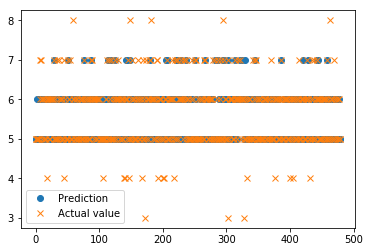

In [21]:
#plot the result
plt.plot(clf.predict(X_test), 'o')
plt.plot(y_test, 'x')
plt.legend(( 'Prediction', 'Actual value'))

In [ ]:
# Score versus C value
ax = sns.lineplot(x=clf.cv_results_['param_C'] ,y=clf.cv_results_['mean_test_score']);
ax.set(xlabel='C value', ylabel='Score')
plt.show()